#### Name : Susmita Rani Saha , ID : B180305047                            
#### Name : Tanvir Ahammed Hridoy , ID : B180305020

# Multiple Linear Regression(petrol_consumption.csv) :

## 1. Exploratory Data Analysis
We'll load the data into a DataFrame using Pandas:

In [1]:
import pandas as pd

Let's read the CSV file and package it into a DataFrame:

In [2]:
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)

Once the data is loaded in, let's take a quick peek at the first 5 values using the head() method:

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


We can also check the shape of our dataset via the shape property:

In [4]:
df.shape

(48, 5)

There is no consensus on the size of our dataset. Let's keep exploring it and take a look at the descriptive statistics of this new data. This time, we will facilitate the comparison of the statistics by rounding up the values to two decimals with the round() method, and transposing the table with the T property:

In [9]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


The Seaborn plot we are using is regplot, which is short from regression plot. It is a scatterplot that already plots the scattered data along with the regression line. If you'd rather look at a scatterplot without the regression line, use sns.scatteplot instead.

These are our four plots:

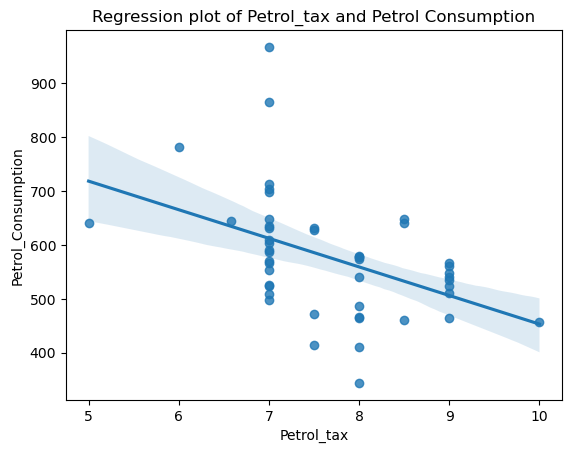

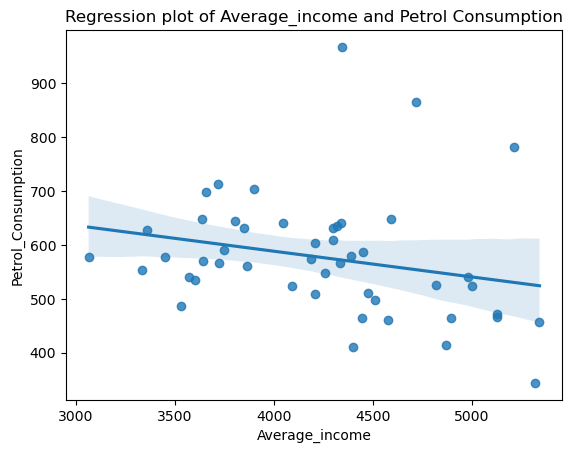

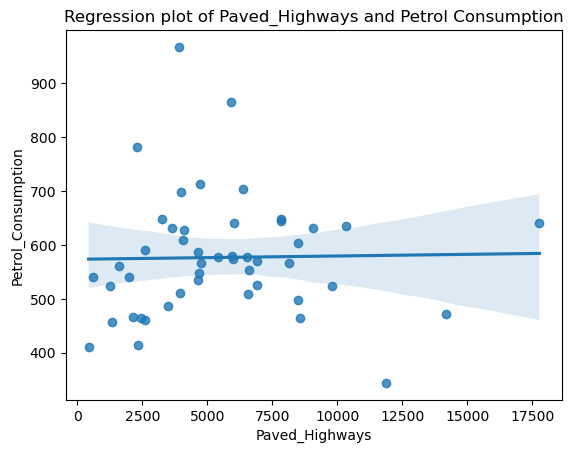

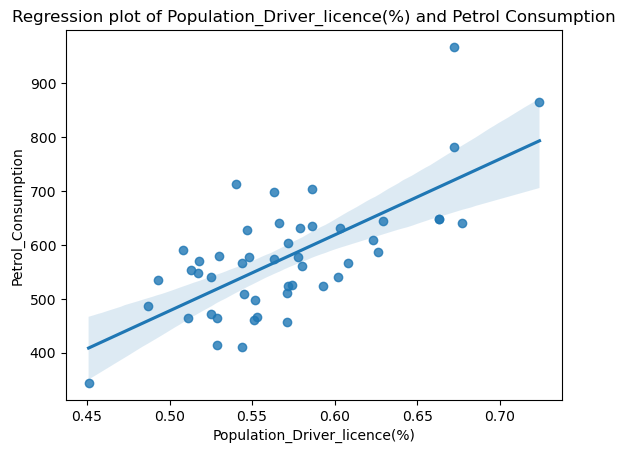

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    #df.plot.scatter(x=var, y='Petrol_Consumption', title='Scatterplot of hours and scores percentages');
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes best-fitting regression line ,which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

We can also calculate the correlation of the new variables, this time using Seaborn's heatmap() to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

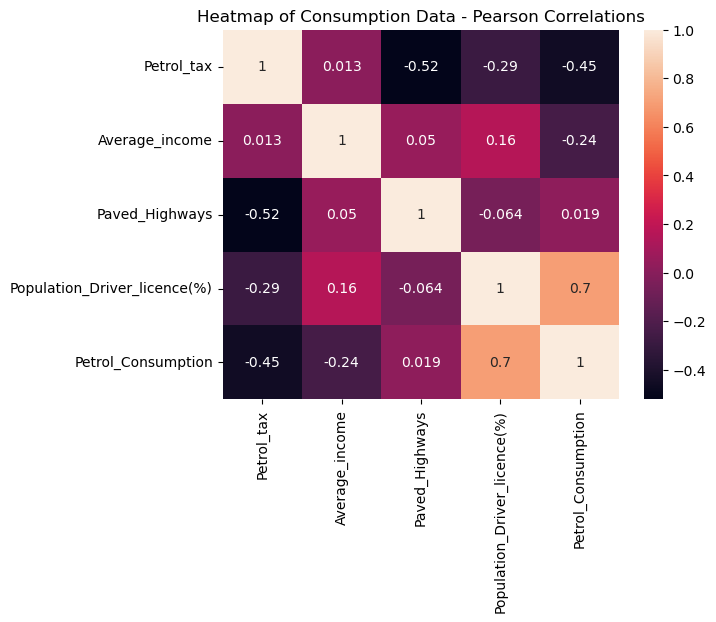

In [28]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

## Preparing the Data
We can use double brackets [[ ]] to select them from the dataframe:

In [58]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [59]:
from sklearn.model_selection import train_test_split

After setting our X and y sets, we can divide our data into train and test sets. We will be using the same seed and 20% of our data for training:

In [60]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

## Training the Multivariate Model
After splitting the data, we can train our multiple regression model. Notice that now there is no need to reshape our X data, once it already has more than one dimension:

In [61]:
X.shape

(48, 4)

To train our model we can execute the same code as before, and use the fit() method of the LinearRegression class:

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

After fitting the model and finding our optimal solution, we can also look at the intercept and And at the coefficients of the features :

In [63]:
print(regressor.intercept_)
print(regressor.coef_)

361.4508790666836
[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]


To do that, we can assign our column names to a feature_names variable, and our coefficients to a model_coefficients variable. After that, we can create a dataframe with our features as an index and our coefficients as column values called coefficients_df:

In [64]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


## Making Predictions with the Multivariate Regression Model
let's predict with the test data:

In [41]:
y_pred = regressor.predict(X_test)

Now, that we have our test predictions, we can better compare them with the actual output values for X_test by organizing them in a DataFrameformat:

In [42]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [44]:
regressor.score(X_test,y_test)

0.3913664001430538

## Evaluating the Multivariate Model
After exploring, training and looking at our model predictions - our final step is to evaluate the performance of our multiple linear regression. We want to understand if our predicted values are too far from our actual values. We'll do this in the same way we had previously done, by calculating the MAE, MSE and RMSE metrics.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90
